In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
df1991 = pd.read_csv('02-5-child-heart-surgery-1991-x.csv')
df2012 = pd.read_csv('02-5-child-heart-surgery-2012-x.csv')

In [3]:
df1991.head()

,Hospital,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying
0,Bristol,143,102,41,71.3,28.7
1,Leicester,187,162,25,86.6,13.4
2,Leeds,323,299,24,92.6,7.4
3,Oxford,122,99,23,81.1,18.9
4,Guys,164,139,25,84.8,15.2


In [4]:
df2012.head()

,Hospital,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying
0,London - Harley Street,418,413,5,98.8,1.2
1,Leicester,607,593,14,97.7,2.3
2,Newcastle,668,653,15,97.8,2.2
3,Glasgow,760,733,27,96.4,3.6
4,Southampton,829,815,14,98.3,1.7


## Survival in under-1s in 1991-1995

In [14]:
Bristol = df1991[df1991.Hospital == 'Bristol']
Bristol

,Hospital,Operations,Survivors,Deaths,ThirtyDaySurvival,PercentageDying
0,Bristol,143,102,41,71.3,28.7


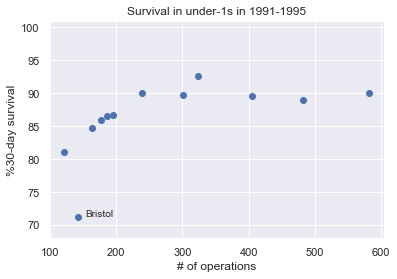

In [35]:
plt.scatter(df1991.Operations, df1991.ThirtyDaySurvival);
plt.ylim([68, 101])
plt.title('Survival in under-1s in 1991-1995');
plt.ylabel('%30-day survival')
plt.xlabel('# of operations')
plt.text(Bristol.Operations + 10, Bristol.ThirtyDaySurvival, 'Bristol');
plt.savefig('1991.png')

## Survival for all children, 2012-2015

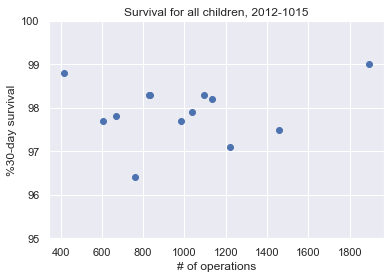

In [36]:
plt.scatter(df2012.Operations, df2012.ThirtyDaySurvival);
plt.ylim([95, 100])
plt.title('Survival for all children, 2012-1015');
plt.ylabel('%30-day survival')
plt.xlabel('# of operations');
plt.savefig('2012.png')

## Pearson Correlation Coefficient

``scipy.stats.pearsonr(x, y)``

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html


In [30]:
import scipy.stats as stats

In [31]:
stats.pearsonr(df1991.Operations, df1991.ThirtyDaySurvival)

(0.5836903619890552, 0.04631739742249065)

In [33]:
df1991_woBristol = df1991[df1991.Hospital != 'Bristol']

In [34]:
stats.pearsonr(df1991_woBristol.Operations, df1991_woBristol.ThirtyDaySurvival)

(0.6627750481483313, 0.026247932354399713)

In [41]:
stats.spearmanr(df1991_woBristol.Operations, df1991_woBristol.ThirtyDaySurvival)

SpearmanrResult(correlation=0.7972685832618591, pvalue=0.0032922642485823414)

In [38]:
stats.pearsonr(df2012.Operations, df2012.ThirtyDaySurvival)

(0.16152501205191117, 0.5980626937559995)

In [39]:
stats.spearmanr(df2012.Operations, df2012.ThirtyDaySurvival)

SpearmanrResult(correlation=0.0027663178805594477, pvalue=0.9928438960989477)

## Spearman's Correlation
``scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate')``

Calculate a Spearman correlation coefficient with associated p-value.

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [37]:
stats.spearmanr(df1991.Operations, df1991.ThirtyDaySurvival)

SpearmanrResult(correlation=0.8371291296643238, pvalue=0.0006820012896813308)

In [40]:
stats.spearmanr(df2012.Operations, df2012.ThirtyDaySurvival)

SpearmanrResult(correlation=0.0027663178805594477, pvalue=0.9928438960989477)